# Computer Vision
## Exercise Sheet 1: Imaging
### Erhardt Barth / Christoph Linse / Manuel Laufer / Kathleen Anderson
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{erhardt.barth, c.linse, m.laufer, k.anderson} @uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. Mika Hoppe *(mika.hoppe@student.uni-luebeck.de)*
2.
3.
4.
5.


In [2]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

Cloning into 'cs4250'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 94 (delta 41), reused 68 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 1.26 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [3]:
import cv2 # open cv
import matplotlib.pyplot as plt # plotting tools
import numpy as np # matrix, array operations

from os.path import join # combine different items to a path
from os import getcwd, listdir # shows the current directory, lists items in a directory

# show plots when running cell
%matplotlib inline

## Exercise 1.1
### Loading and displaying images in Python
Download the image `clown.png` from the website of the tutorial. Load
the image in Python via opencv (`cv2.imread`). By default the image is loaded as BGR (blue, green, red), convert the image to gray with `cv2.cvtColor`.
Display the image `plt.imshow`, use the colormap `gray`.

(np.float64(-0.5), np.float64(319.5), np.float64(199.5), np.float64(-0.5))

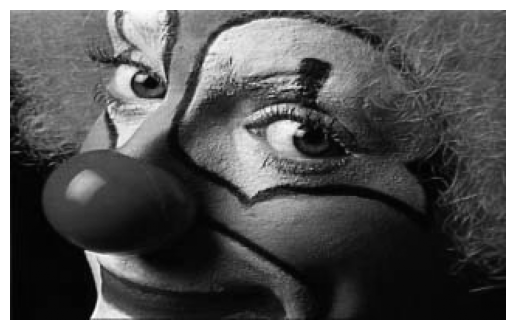

In [90]:
# TODO: define image path
path = '/content/cs4250/data/exercise_1/clown.png'
# TODO: read image
image = cv2.imread(path)
# TODO: convert image to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# TODO: display image
plt.imshow(grayscale, cmap="gray")
plt.axis("off")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exercise 1.2
### Image gradients
Images are stored as `numpy arrays`, for further computations convert the array to range $[0, 1]$ (`astype`). Define a function `load_gray_normalized` that loads the image, converts it to grayscale and normalizes it.
Compute the image gradients $d_x$ and $d_y$ for the image from the previous assignment. Initialize a simple gradient kernel like $[-1, 0, +1]$ for $d_x$ (`np.zeros`, `np.array`) and filter the image with it (`cv2.filter2D`). Visualize the results using `plt.imshow`. To this end, display the resulting images of both derivatives along `x` and `y` in a single figure (`plt.subplots`).

What do you need to take care of, to be able to visually **compare** the results?
Hint: the problem is related to the range of the pixel values in the two
gradient images. Name the problem and propose a solution to it by using the options of the `plt.imshow`
function.

In [91]:
def load_gray_normalized(image_path):
  image = cv2.imread(image_path)
  grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  normalized = grayscale.astype('float32') / 255
  return normalized

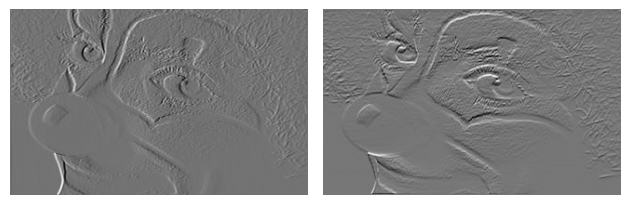

In [92]:
# load image
image = load_gray_normalized(path)

# define kernels
dx_kernel = np.array([[-1, 0, 1]])
dy_kernel = np.array([[-1], [0], [1]])

# filter images
filtered_image_x = cv2.filter2D(image, -1, dx_kernel)
filtered_image_y = cv2.filter2D(image, -1, dy_kernel)

# display images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(filtered_image_x, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_y, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

## Exercise 1.3
### Point operations
Download from the website the images `ueb131.png` and `ueb132.png`,
then load and display them.  
Both images illustrate two commonly encountered problems in photography.
Underexposed (overexposed) images are darker (brighter) than they should be,
because they have been exposed to too little (too much) light.

Compute and display the histograms (`plt.hist`,`np.flatten`) of the images in range $[0,1]$. Write a function `display_with_hist` that creates two subplots, showing the image and the respective histogram.

Can you identify the exposure problems in the histograms?
Hint: look at how the pixel intensities are distributed.

These defects can be corrected by remapping the pixel values to achieve a
more evenly distributed range of pixel intensities.
This can either be done by using histogram equalization (`cv2.equalizeHist`) or by using the logarithmic and power functions.

To use `cv2.equalizeHist`, the images need to be casted to uint8 in $[0,255]$. Write a function `normalized_to_uint8` to do this.

Apply the logarithmic and power to improve the two images. Experiment with different bases for the logarithm and power. To get a better feeling for the problem, plot the functions $x^2$ in $[0,1]$ and $log(x)$ in $[1,255]$ (why not $[0, 255]$?, `np.linspace, np.log, plt.plot`). **Where do the functions change quickly, where do they change slowly? How can you use this knowledge to improve the images?**

In [169]:
def display_with_hist(image):
  plt.figure()
  plt.subplot(2, 1, 1)
  ax = plt.gca()
  ax.set_anchor('W')
  plt.imshow(image, cmap="gray")
  plt.axis("off")

  plt.subplot(2, 1, 2)
  plt.hist(image.flatten() / image.max(), bins=256, range=(0, 1), color="black")
  plt.yticks([])

  plt.tight_layout()
  plt.show()

In [99]:
def normalized_to_uint8(image):
  uint8 = (image * 255).astype('uint8')
  return uint8

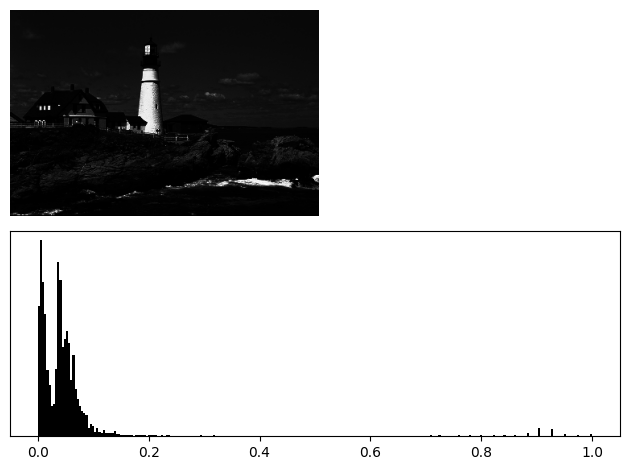

In [170]:
# load and display underexposed image with histograms
image_underexposed = load_gray_normalized('/content/cs4250/data/exercise_1/ueb131.png')
display_with_hist(image_underexposed)

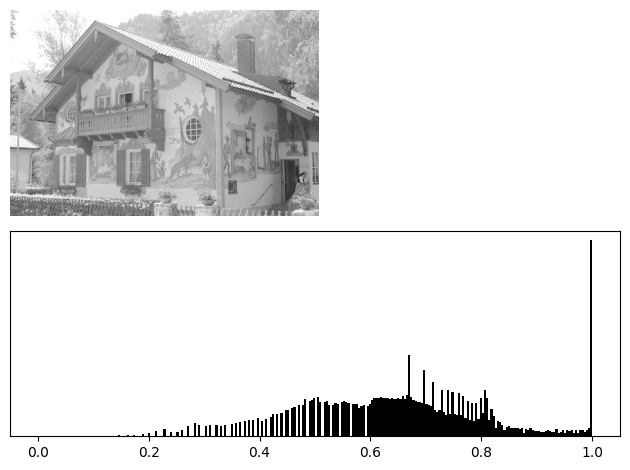

In [171]:
# load and display overexposed image with histograms
image_overexposed = load_gray_normalized('/content/cs4250/data/exercise_1/ueb132.png')
display_with_hist(image_overexposed)

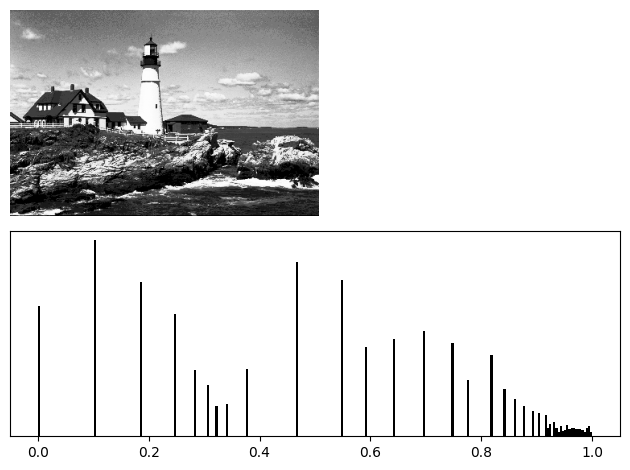

In [172]:
# normalize underexposed image through histogram
image_underexposed_uint8 = normalized_to_uint8(image_underexposed)
image_underexposed_equalized = cv2.equalizeHist(image_underexposed_uint8)
display_with_hist(image_underexposed_equalized / 255)

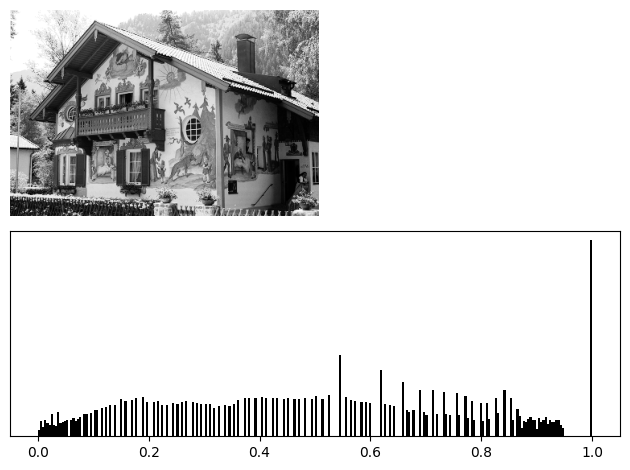

In [173]:
# normalize overexposed image through histogram
image_overexposed_uint8 = normalized_to_uint8(image_overexposed)
image_overexposed_equalized = cv2.equalizeHist(image_overexposed_uint8)
display_with_hist(image_overexposed_equalized / 255)

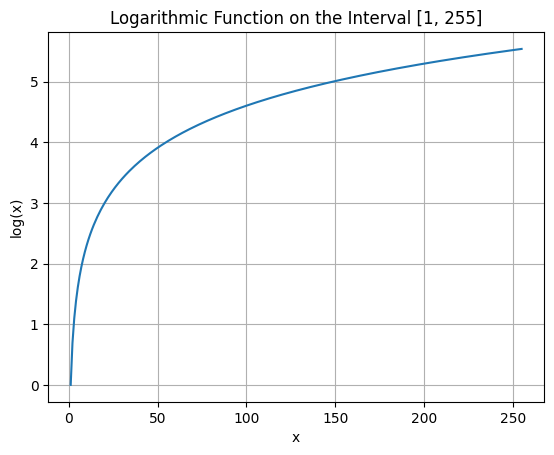

In [129]:
# Generate x values in the interval [1, 255]
x = np.linspace(1, 255, 255)

# Calculate the logarithmic function values
y = np.log(x)

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel("x")
plt.ylabel("log(x)")
plt.title("Logarithmic Function on the Interval [1, 255]")

# Display the plot
plt.grid(True)
plt.show()

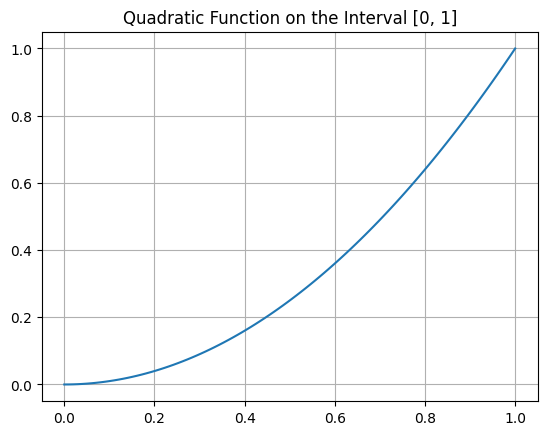

In [126]:
# Create an array of x values in the interval [0, 1]
x = np.linspace(0, 1, 100)

# Calculate the quadratic y values
y = x**2

# Create the plot
plt.plot(x, y)

# Set labels and title
plt.title("Quadratic Function on the Interval [0, 1]")

# Display the plot
plt.grid(True)
plt.show()

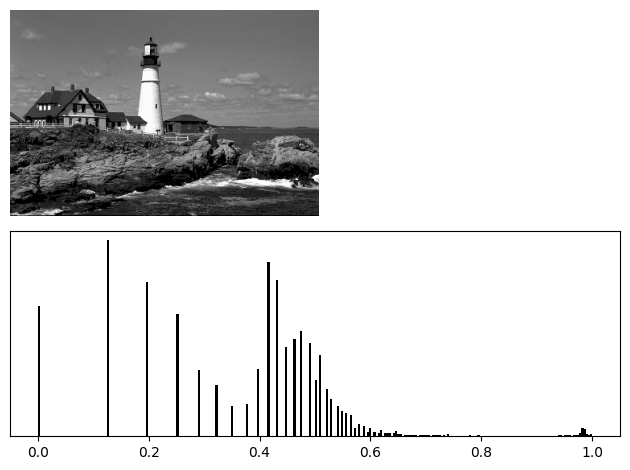

In [175]:
image_underexposed_normalized = (image_underexposed * 255) + 1
display_with_hist(np.log(image_underexposed_normalized))

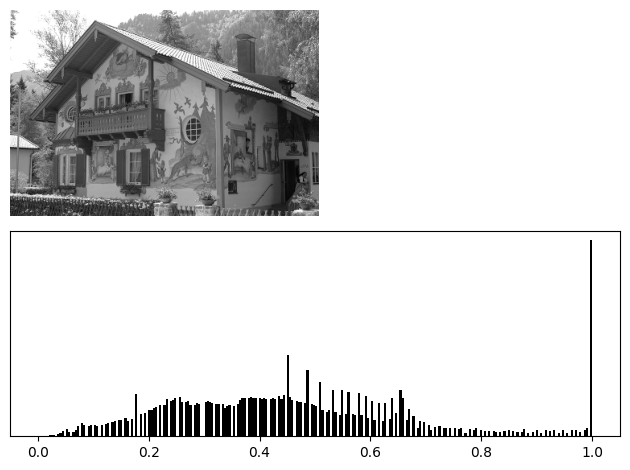

In [174]:
image_overexposed_normalized = image_overexposed ** 2
display_with_hist(image_overexposed_normalized)